## Introduction/Business Problem

Lima is the capital of Peru, a country known for its rich culture, its beautiful beaches, tourist spots, and delicious cuisine. The capital has many tourist places that many people, including its own citizens, do not know. That is why I decided to focus my project in Lima, Peru. The main objective is to focus on at least 3 tourist places, and find the best hotels based on reputation and proximity to the place


In [2]:

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')


Folium installed
Libraries imported.


## Data
The data will be obtained mainly from Foursquare, I will use the information they have from the hotels around the area. I'll use features such as location.formattedAddress,location.distancento and location.city determine the safest hotels for tourists.Also, I'll be using information from the INEI, to extract data from the most visited turist sites of every district in Lima.

In [260]:
tab=pd.read_excel("/Users/lindagabriellegonzales/Documents/Turistas.xls",header=3)

In [261]:
tab
# In this Database, we can see the number of tourist per tourist site in Lima,Peru.I'll select the last three years only

,Año,Total,Museo Nacional de Arqueología e Historia del Perú,Museo de la Nación,Museo de Arte Italiano,Museo de la Cultura Peruana,Zona Arqueológica Pachacámac,Zona Arqueológica Puruchuco,Zona Arqueológica Huallamarca,Museo de Sitio Cerro San Cristóbal,Museo de Sitio y Centro Arqueológico Pucllana,Museo José Carlos Mariátegui,Complejo Arqueológico Mateo Salado\n,Casa de la Gastronomía Peruana\n
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003,358703.0,137466.0,75715,4689.0,4103.0,75382.0,13325.0,5104.0,20704.0,20880.0,1335.0,NaN,NaN
3,2004,387594.0,139038.0,74432,4550.0,3912.0,82981.0,12716.0,6817.0,19160.0,41504.0,2484.0,NaN,NaN
4,2005,428758.0,167959.0,83460,3872.0,4044.0,83541.0,16637.0,10293.0,23634.0,30946.0,4372.0,-,-
5,2006,443218.0,184680.0,77625,3974.0,3222.0,97776.0,14978.0,10309.0,21989.0,19245.0,9420.0,-,-
6,2007,414493.0,153880.0,104493,3307.0,4271.0,71787.0,13158.0,13508.0,5924.0,36093.0,8072.0,-,-
7,2008,490987.0,180869.0,78932,17084.0,6604.0,86660.0,20651.0,16606.0,23846.0,50142.0,9593.0,0,0
8,2009,472899.0,143628.0,92721,13945.0,7475.0,85712.0,18205.0,18558.0,19222.0,65215.0,8218.0,0,0
9,2010,500372.0,150733.0,98876,7427.0,7050.0,117656.0,20181.0,21247.0,11465.0,57605.0,8132.0,0,0


In [263]:
tab=tab.iloc[16:19]
tab=tab.drop(columns=['Año','Total'])

In [264]:
tab.shape

(3, 12)

In [265]:
tab

,Museo Nacional de Arqueología e Historia del Perú,Museo de la Nación,Museo de Arte Italiano,Museo de la Cultura Peruana,Zona Arqueológica Pachacámac,Zona Arqueológica Puruchuco,Zona Arqueológica Huallamarca,Museo de Sitio Cerro San Cristóbal,Museo de Sitio y Centro Arqueológico Pucllana,Museo José Carlos Mariátegui,Complejo Arqueológico Mateo Salado\n,Casa de la Gastronomía Peruana\n
16,205134.0,58265,15355.0,17624.0,150335.0,26463.0,23228.0,26072.0,139647.0,4983.0,10724,32135
17,219275.0,55240,22321.0,29968.0,152873.0,32923.0,17835.0,8057.0,168460.0,6317.0,12420,3349
18,76469.0,80901,14894.0,62265.0,165105.0,33821.0,17656.0,6896.0,176597.0,10810.0,12491,33124


In [268]:
tab=tab.transpose()
tab.columns = ["2017", "2018", "2019"]

In [269]:
tab.dtypes
tab=tab.astype(float)

In [270]:
tab['mean']=tab.mean(numeric_only=True, axis=1)

In [271]:
tab=tab[['mean']]

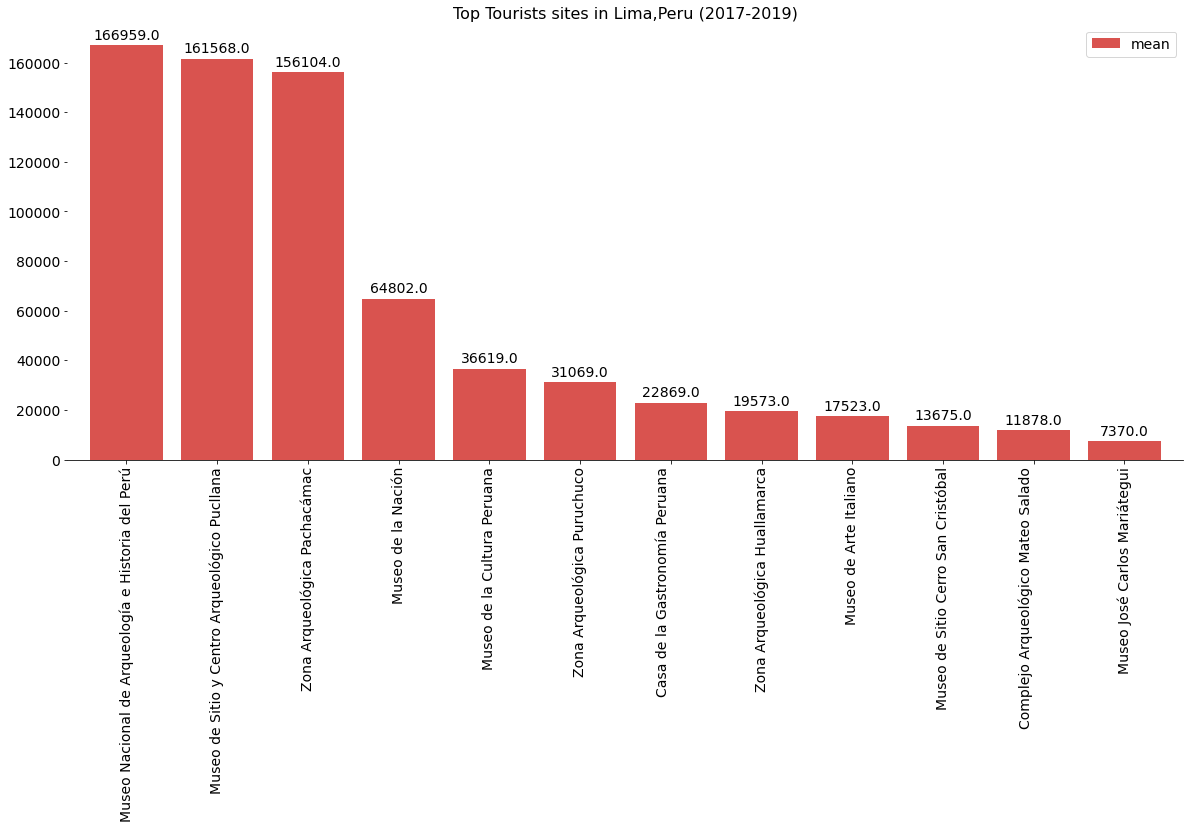

In [278]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
tab.sort_values(by=["mean"],ascending=False,inplace=True)
ax=tab.plot(kind='bar', figsize=(20, 8),width=0.8,stacked=False,color=['#d9534f'],fontsize=14)

ax.set_title('Top Tourists sites in Lima,Peru (2017-2019)',fontsize=16) # add title to the plot
ax.legend(fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
for p in ax.patches:
                    ax.annotate(np.round(p.get_height(),decimals=0),
                    (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center',
                    va='center',
                    xytext=(0, 10),
                    textcoords='offset points',
                    fontsize = 14)
plt.show()
#As we can see, from this data, I'll work with the top 3 tourists sites in Lima
#which are 'Museo Nacional de Arqueología e Historia del Perú','Museo de Sitio y Centro Arqueológico Pucllana' 
#and 'Zona Arqueologica Pachacamac'


## Foursquare

Now that we have our location candidates, let's use Foursquare API to get info on hotels near this tourist sites.

We're interested in venues in 'hotel' category, they  have to be at least 2000 meters from each site and should have good reviews


In [4]:
CLIENT_ID = 'WTELGBA2XATA2POVFX4JRHECRCUBPQJTDJXBU4MTIXTUPILL' # your Foursquare ID
CLIENT_SECRET = 'KU2ZIYQ0KAID4I3T510MNXMU1X5SSCNKLSGKLAQKL05M52PT' # your Foursquare Secret
ACCESS_TOKEN = 'YITG3SOHAQGETQXIM21BR0VGE1QZEOH4VEOB1PCYERF4YNUU' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WTELGBA2XATA2POVFX4JRHECRCUBPQJTDJXBU4MTIXTUPILL
CLIENT_SECRET:KU2ZIYQ0KAID4I3T510MNXMU1X5SSCNKLSGKLAQKL05M52PT


In [26]:
addresses=['Museo de Sitio Huaca Pucllana','Pachacamac','Plaza Bolivar, Pueblo Libre']


coor=[]

for i in addresses:
    address=i
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    if(location == None):
        print('Please enter a Valid address')
        exit()
    latitude = location.latitude
    longitude = location.longitude
    print(latitude, longitude)
    search_query = 'hotel'
    radius = 2000

    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
    coor.append(url)

-12.1110699 -77.0333529
-12.2498244 -76.9067941784113
-12.07774445 -77.0622459


In [27]:
results1 = requests.get(coor[0]).json()
results2 = requests.get(coor[1]).json()
results3 = requests.get(coor[2]).json()

In [28]:
venues1 = results1['response']['venues']
venues2 = results2['response']['venues']
venues3 = results3['response']['venues']

# tranform venues into a dataframe
d1 = pd.json_normalize(venues1)
d1.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id
0,4bc78a3f93bdeee1d87e37ae,Roosevelt Hotel & Suites,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609218767,False,Av. Alvarez Calderón 194,esq. Miguel Dasso,-12.105507,-77.040073,"[{'label': 'display', 'lat': -12.1055068374352...",958,27,PE,San Isidro,Lima,Perú,"[Av. Alvarez Calderón 194 (esq. Miguel Dasso),...",141336455
1,4bc78a3e93bdeee1d67e37ae,NM Lima Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609218767,False,Av. Pardo y Aliaga 300,NaN,-12.107321,-77.035941,"[{'label': 'display', 'lat': -12.1073212221942...",503,27,PE,San Isidro,Lima,Perú,"[Av. Pardo y Aliaga 300, San Isidro, 27]",NaN
2,4dfc2f6b183853f2cb4fe42e,Regency Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609218767,False,Av. Angamos Oeste 853,NaN,-12.114097,-77.037480,"[{'label': 'display', 'lat': -12.1140971610279...",561,NaN,PE,Miraflores,Lima,Perú,"[Av. Angamos Oeste 853, Miraflores]",NaN
3,4e07e0fa1838eb15af04cdce,Hotel Runcu,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609218767,False,Av. De la Aviación 139,NaN,-12.119528,-77.042248,"[{'label': 'display', 'lat': -12.1195282852446...",1350,18,PE,Miraflores,Lima,Perú,"[Av. De la Aviación 139, Miraflores, 18]",NaN
4,4ce6d615f8653704376fa5c4,Habitat Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609218767,False,Ca. Piura 105,esq. Av. Arequipa,-12.115949,-77.029457,"[{'label': 'display', 'lat': -12.1159486403880...",689,18,PE,Miraflores,Lima,Perú,"[Ca. Piura 105 (esq. Av. Arequipa), Miraflores...",NaN


In [29]:
d2 = pd.json_normalize(venues2)
d2.head()

,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country
0,5255928911d20c87c777b559,los huertos De Lurin - Hotel El Sol,"[{'id': '4bf58dd8d48988d15f941735', 'name': 'F...",v-1609218767,False,-12.256814,-76.886708,"[{'label': 'display', 'lat': -12.2568135254016...",2319,PE,Perú


In [31]:
d3 = pd.json_normalize(venues3)
d3.head()

,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.address,location.postalCode,location.city,location.state,location.formattedAddress,location.crossStreet,location.neighborhood,venuePage.id
0,4f504c06e4b044218fb8129a,Hotel Cancún,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1609218768,False,-12.074103,-77.062464,"[{'label': 'display', 'lat': -12.0741034351688...",406,PE,Perú,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4d1d88138629224b1414fa86,Hotel By Pass,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609218768,False,-12.085485,-77.063532,"[{'label': 'display', 'lat': -12.0854847161661...",872,PE,Perú,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55cce384498ee68fe8be6555,Hotel Gala (3 estrellas),"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609218768,False,-12.072959,-77.062161,"[{'label': 'display', 'lat': -12.0729585328286...",532,PE,Perú,Av. Antonio Jose de Sucre 154,15084,Lima,Lima,"[Av. Antonio Jose de Sucre 154, Lima, 15084]",NaN,NaN,NaN
3,4f4318afbe777735d015fd50,Hotel Mamatila,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609218768,False,-12.075770,-77.054737,"[{'label': 'display', 'lat': -12.0757702498014...",846,PE,Perú,"Antonio Arrieta 110, Pueblo Libre",NaN,Lima,Lima,"[Antonio Arrieta 110, Pueblo Libre, Lima]",NaN,NaN,NaN
4,5000e8b4c84c6f5fde77a1dd,Hotel Pueblo Libre,"[{'id': '4bf58dd8d48988d1ee931735', 'name': 'H...",v-1609218768,False,-12.069916,-77.061646,"[{'label': 'display', 'lat': -12.0699159700223...",873,PE,Perú,Av. Jose de San Martin 301,001,Pueblo Libre,Lima,[Av. Jose de San Martin 301 (Av. Jose de San M...,Av. Jose de San Martín,NaN,NaN
